In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

In [5]:
df = pd.read_csv("thursday.csv")

In [6]:
df.sample()

,tmstmp,typ,stpnm,stpid,vid,dstp,rt,rtdd,rtdir,des,...,tablockid,tatripid,origtatripno,dly,dyn,prdctdn,zone,psgld,stst,stsd
472023,20211026 14:56,A,Glen/Catherine Outbound,M309,3046.0,12186,BB,BB,NORTHBOUND,Baits I,...,210BB,325951,325951,False,0,13,NaN,NaN,54300,2021-10-26


In [7]:
df.stpnm.unique()

array(['Baits II Inbound', 'Bursley Hall Inbound',
       'Hayward/Hubbard  Hubbard Outbound', 'Glen/Catherine Outbound',
       'Fuller Rd at Mitchell Field  Lot M-75',
       'Central Campus Transit Center: Ruthven Museum',
       'Pierpont Commons  Murfin Outbound', 'FXB Inbound',
       'Cooley Lab Inbound', 'Northwood I Outbound',
       'NCAC, Hubbard Outbound',
       'Fuller Rd at Lot NC-78  Mitchell Field (1)', 'Northwood V (3)',
       'Power Center', 'Glen/Catherine Inbound',
       'Pierpont Commons  Bonisteel Inbound', 'Cardiovascular Center',
       'NCAC  Hubbard Inbound', 'Hayward/Hubbard  Hubbard Inbound',
       'Plymouth Rd Crosswalk', 'Northwood Community Center',
       'Northwood III Outbound', 'Northwood II Outbound',
       'Stockwell Hall Outbound', 'Rackham Bldg',
       'Central Campus Transit Center: Chemistry', 'Couzens Hall',
       'Cancer Center Inbound', 'Mott Hospital', 'Markley Hall',
       'Taubman Outbound', 'Cancer Center Outbound', 'Taubman Inbou

In [8]:
df.rt.unique()

array(['BB', 'NW', 'WX', 'MX', 'CN', 'CS', 'WS', 'NE', 'NX', 'DD', 'CSX'],
      dtype=object)

In [23]:
df.rtdir.unique()

array(['SOUTHBOUND', 'NORTHBOUND', 'OUTBOUND', 'INBOUND'], dtype=object)

In [9]:
df.tmstmp = pd.to_datetime(df.tmstmp)

# Which bus route is most frequent when going to North from CCTC?

In [10]:
routeList = ['BB', 'NW', 'CN', 'NX', 'DD']
stoptimes = df[df.rt.isin(routeList) & df.rtdir.eq("NORTHBOUND") & (df.stpnm.eq("Central Campus Transit Center: Chemistry") | df.stpnm.eq("Central Campus Transit Center: Ruthven Museum"))].groupby([df.tmstmp.dt.date, "tatripid"]).agg("last")

In [11]:
stoptimes

tmstmp typ  \
tmstmp     tatripid                           
2021-10-24 325675   2021-10-24 23:58:00   D   
           325676   2021-10-24 23:58:00   D   
           325677   2021-10-24 23:39:00   D   
           325678   2021-10-24 23:30:00   D   
           325679   2021-10-24 23:14:00   D   
...                                 ...  ..   
2021-10-28 339147   2021-10-28 11:28:00   A   
           339148   2021-10-28 11:49:00   A   
           345560   2021-10-28 05:38:00   A   
           345561   2021-10-28 05:49:00   A   
           345562   2021-10-28 05:59:00   A   

                                                             stpnm stpid  \
tmstmp     tatripid                                                        
2021-10-24 325675         Central Campus Transit Center: Chemistry  C250   
           325676         Central Campus Transit Center: Chemistry  C250   
           325677         Central Campus Transit Center: Chemistry  C250   
           325678         Central Campus Transit Center: Chemistry  C250   
           325679         Central Campus Transit Center: Chemistry  C250   
...                                                            ...   ...   
2021-10-28 339147    Central Campus Transit Center: Ruthven Museum  C251   
           339148    Central Campus Transit Center: Ruthven Museum  C251   
           345560         Central Campus Transit Center: Chemistry  C250   
           345561         Central Campus Transit Center: Chemistry  C250   
           345562         Central Campus Transit Center: Chemistry  C250   

                        vid   dstp  rt rtdd       rtdir           des  \
tmstmp     tatripid                                                     
2021-10-24 325675    3019.0  13982  BB   BB  NORTHBOUND       Baits I   
           325676    3018.0     86  BB   BB  NORTHBOUND       Baits I   
           325677    3019.0     30  BB   BB  NORTHBOUND       Baits I   
           325678    3018.0     89  BB   BB  NORTHBOUND       Baits I   
           325679    3019.0    -50  BB   BB  NORTHBOUND       Baits I   
...                     ...    ...  ..  ...         ...           ...   
2021-10-28 339147    3017.0   1094  NX   NX  NORTHBOUND  North Campus   
           339148    3037.0    973  NX   NX  NORTHBOUND  North Campus   
           345560    3039.0    -11  CN   CN  NORTHBOUND   Glazier Way   
           345561       NaN      0  CN   CN  NORTHBOUND   Glazier Way   
           345562       NaN      0  CN   CN  NORTHBOUND   Glazier Way   

                              prdtm tablockid  origtatripno    dly  dyn  \
tmstmp     tatripid                                                       
2021-10-24 325675    20211025 00:15     411BB        325675  False    0   
           325676    20211025 00:00     412BB        325676  False    0   
           325677    20211024 23:45     411BB        325677  False    0   
           325678    20211024 23:30     412BB        325678  False    0   
           325679    20211024 23:15     411BB        325679  False    0   
...                             ...       ...           ...    ...  ...   
2021-10-28 339147    20211028 11:30    254NWE        339147  False    0   
           339148    20211028 11:50    257NWE        339148  False    0   
           345560    20211028 05:38    106COM        345560  False    0   
           345561    20211028 05:50    107COM        345561  False    0   
           345562    20211028 06:00    108COM        345562  False    0   

                    prdctdn  zone  psgld   stst        stsd  
tmstmp     tatripid                                          
2021-10-24 325675        15   NaN    NaN  87300  2021-10-24  
           325676       DUE   NaN    NaN  86400  2021-10-24  
           325677         4   NaN    NaN  85500  2021-10-24  
           325678       DUE   NaN    NaN  84600  2021-10-24  
           325679       DUE   NaN    NaN  83700  2021-10-24  
...                     ...   ...    ...    ...         ...  
2021-10-28

In [12]:
stoptimes.index.names = ["date", "tatripid"]
stoptimes

tmstmp typ  \
date       tatripid                           
2021-10-24 325675   2021-10-24 23:58:00   D   
           325676   2021-10-24 23:58:00   D   
           325677   2021-10-24 23:39:00   D   
           325678   2021-10-24 23:30:00   D   
           325679   2021-10-24 23:14:00   D   
...                                 ...  ..   
2021-10-28 339147   2021-10-28 11:28:00   A   
           339148   2021-10-28 11:49:00   A   
           345560   2021-10-28 05:38:00   A   
           345561   2021-10-28 05:49:00   A   
           345562   2021-10-28 05:59:00   A   

                                                             stpnm stpid  \
date       tatripid                                                        
2021-10-24 325675         Central Campus Transit Center: Chemistry  C250   
           325676         Central Campus Transit Center: Chemistry  C250   
           325677         Central Campus Transit Center: Chemistry  C250   
           325678         Central Campus Transit Center: Chemistry  C250   
           325679         Central Campus Transit Center: Chemistry  C250   
...                                                            ...   ...   
2021-10-28 339147    Central Campus Transit Center: Ruthven Museum  C251   
           339148    Central Campus Transit Center: Ruthven Museum  C251   
           345560         Central Campus Transit Center: Chemistry  C250   
           345561         Central Campus Transit Center: Chemistry  C250   
           345562         Central Campus Transit Center: Chemistry  C250   

                        vid   dstp  rt rtdd       rtdir           des  \
date       tatripid                                                     
2021-10-24 325675    3019.0  13982  BB   BB  NORTHBOUND       Baits I   
           325676    3018.0     86  BB   BB  NORTHBOUND       Baits I   
           325677    3019.0     30  BB   BB  NORTHBOUND       Baits I   
           325678    3018.0     89  BB   BB  NORTHBOUND       Baits I   
           325679    3019.0    -50  BB   BB  NORTHBOUND       Baits I   
...                     ...    ...  ..  ...         ...           ...   
2021-10-28 339147    3017.0   1094  NX   NX  NORTHBOUND  North Campus   
           339148    3037.0    973  NX   NX  NORTHBOUND  North Campus   
           345560    3039.0    -11  CN   CN  NORTHBOUND   Glazier Way   
           345561       NaN      0  CN   CN  NORTHBOUND   Glazier Way   
           345562       NaN      0  CN   CN  NORTHBOUND   Glazier Way   

                              prdtm tablockid  origtatripno    dly  dyn  \
date       tatripid                                                       
2021-10-24 325675    20211025 00:15     411BB        325675  False    0   
           325676    20211025 00:00     412BB        325676  False    0   
           325677    20211024 23:45     411BB        325677  False    0   
           325678    20211024 23:30     412BB        325678  False    0   
           325679    20211024 23:15     411BB        325679  False    0   
...                             ...       ...           ...    ...  ...   
2021-10-28 339147    20211028 11:30    254NWE        339147  False    0   
           339148    20211028 11:50    257NWE        339148  False    0   
           345560    20211028 05:38    106COM        345560  False    0   
           345561    20211028 05:50    107COM        345561  False    0   
           345562    20211028 06:00    108COM        345562  False    0   

                    prdctdn  zone  psgld   stst        stsd  
date       tatripid                                          
2021-10-24 325675        15   NaN    NaN  87300  2021-10-24  
           325676       DUE   NaN    NaN  86400  2021-10-24  
           325677         4   NaN    NaN  85500  2021-10-24  
           325678       DUE   NaN    NaN  84600  2021-10-24  
           325679       DUE   NaN    NaN  83700  2021-10-24  
...                     ...   ...    ...    ...         ...  
2021-10-28

In [13]:
# Creating route specific stoptime csv
# stoptimes should cover all the buses going north from cctc
# ['BB', 'NW', 'CN', 'NX', 'DD'] all the routes covered in stoptimes
# these data frames are for the specific buses going north from cctc
stoptimesBB = stoptimes[stoptimes.rt.eq("BB")]
stoptimesNW = stoptimes[stoptimes.rt.eq("NW")]
stoptimesCN = stoptimes[stoptimes.rt.eq("CN")]
stoptimesNX = stoptimes[stoptimes.rt.eq("NX")]
stoptimesDD = stoptimes[stoptimes.rt.eq("DD")]

In [22]:
def formatting(indata) :
    indata.tmstmp = pd.to_datetime(indata.tmstmp) 
    stoptimes = indata[indata.rt.isin(routeList) & indata.rtdir.eq("NORTHBOUND") 
               & (indata.stpnm.eq("Central Campus Transit Center: Chemistry") | 
                  indata.stpnm.eq("Central Campus Transit Center: Ruthven Museum"))]
    stoptimes = stoptimes.groupby([stoptimes.tmstmp.dt.date, "tatripid"]).agg("last")
    stoptimes.index.names = ["date", "tatripid"]
    return stoptimes

In [14]:
def WaittimesCalc(intimes):
    waittimes = intimes.tmstmp.reset_index(level=1).groupby("date").agg(lambda x: x.sort_values().diff())
    waittimes = waittimes.reset_index()
    waittimes = pd.concat([waittimes.drop(['tmstmp'], axis=1), waittimes['tmstmp'].apply(pd.Series)], axis=1)
    waittimes = waittimes.melt(id_vars=["date"])
    waittimes = waittimes[["date", "value"]]
    waittimes["value"] = waittimes.value.dt.total_seconds()/60
    waittimes["zscores"] = (waittimes["value"] - waittimes["value"].mean())/waittimes["value"].std()
    waittimes = waittimes[waittimes.zscores < 3]
    return waittimes

In [15]:
def avgWaitCalc(intimes):
    waittimes = WaittimesCalc(intimes)
    return waittimes.value.mean()

In [16]:
# def avgWaitCalc(intimes, route, stop, direct):
#     intimes = intimes[intimes.rt.eq(route) & intimes.stpnm.eq(stop) & intimes.rtdir.eq(direct)]
#     return avgWaitCalc(intimes)
# def avgWaitCalc(intimes, stop, direct):
#     intimes = intimes[intimes.stpnm.eq(stop) & intimes.rtdir.eq(direct)]
#     return avgWaitCalc(intimes)
# def avgWaitCalc(intimes, route):
#     intimes = intimes[intimes.rt.eq(route)]
#     return avgWaitCalc(intimes)

In [17]:
def graphWaittimes(intimes):
    waittimes = WaittimesCalc(intimes)
    return sns.displot(waittimes.value)

In [21]:
avgWaitCalc(df.groupby([df.tmstmp.dt.date, "tatripid"]).agg("last"))

KeyError: 'date'

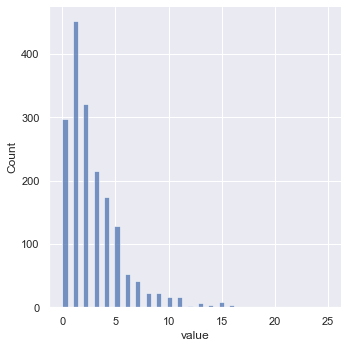

In [19]:
graphWaittimes(stoptimes)

In [ ]:
graphWaittimes(stoptimesBB)

In [ ]:
graphWaittimes(stoptimesNW)

In [20]:
# average wait for any bus north at cctc
avgWaitCalc(stoptimes)

2.6802911534154537

In [ ]:
# average wait for a Bursley Bates at cctc (so on)
avgWaitCalc(stoptimesBB)

In [ ]:
avgWaitCalc(stoptimesNW)

In [ ]:
avgWaitCalc(stoptimesCN)

In [ ]:
avgWaitCalc(stoptimesNX)

In [ ]:
avgWaitCalc(stoptimesDD)